In [47]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as sps

In [48]:
ticker = '^GSPC'
start = '2011-12-31'
end = '2021-12-31'
max_t = 64
prices = yf.download(ticker, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [49]:
returns = prices.pct_change()[1:]
n = len(returns)
variance_0 = returns.var()
variance_ratio_output = pd.DataFrame()
for t in np.arange(2, max_t+1):
    variance = returns.rolling(t).sum().var()
    variance_ratio = variance/(variance_0*t) - 1
    standard_error = (2*(2*t - 1)*(t-1)/(3*t*n))**(1/2)
    z_stat = variance_ratio/standard_error
    p_value = 2*(1 - sps.norm.cdf(abs(z_stat)))
    variance_ratio_output[t] = [round(variance_0, 6), round(variance, 6), round(variance_ratio, 4), round(standard_error, 4), round(z_stat, 4), p_value]

the market is mean-reverting


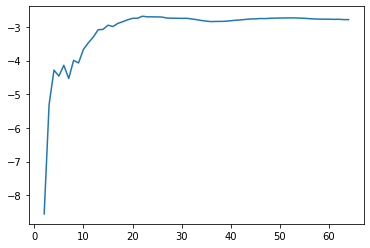

In [50]:
plt.plot(variance_ratio_output.iloc[4])
min_pvalue = min(variance_ratio_output.iloc[5])
max_z_stat = variance_ratio_output.iloc[4][variance_ratio_output.iloc[5] == min_pvalue].values[0]
Chow_Denning = 1 - (1 - min_pvalue)**(max_t)
if Chow_Denning > 0.1:
    print('the market is efficient')
elif max_z_stat > 0:
    print('the market is trending')
else:
    print('the market is mean-reverting')